In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Visualization

In [122]:
# Read CSV
df = pd.read_csv(r"Data\reverse_matching_20240213.csv", sep=";")
df.head()

,cand_id,job_id,distance_km,match_score,match_rank,cand_gender,cand_age_bucket,cand_domicile_province,cand_domicile_region,cand_education,cand_languages_spoken,job_contract_type,job_professional_category,job_sector,job_work_province
0,"11,208",OFF_3435_4864,30.609745,99.309860,1,Female,25-34,VE,VENETO,"Laurea Magistrale : Economia per arti, cultura...",Tedesco;Ebraico;Rumeno,Ricerca e selezione,segretario/segretaria,Segreteria / Servizi Generali,TV
1,"11,208",ORD_13361_0218,42.466312,96.529259,1,Female,25-34,VE,VENETO,"Laurea Magistrale : Economia per arti, cultura...",Tedesco;Ebraico;Rumeno,Lavoro subordinato,Impiegato (m/f),Segreteria / Servizi Generali,PN
2,"11,208",ORD_14183_0606,33.240650,95.374954,2,Female,25-34,VE,VENETO,"Laurea Magistrale : Economia per arti, cultura...",Tedesco;Ebraico;Rumeno,Lavoro subordinato,Addetto alle Risorse Umane (m/f),Risorse Umane / Recruitment,TV
3,"11,208",OFF_635_0402,58.744339,94.199844,2,Female,25-34,VE,VENETO,"Laurea Magistrale : Economia per arti, cultura...",Tedesco;Ebraico;Rumeno,Ricerca e selezione,Operatore Telemarketing,Call Center / Customer Care,PD
4,"11,208",OFF_5814_0606,27.851854,93.688522,3,Female,25-34,VE,VENETO,"Laurea Magistrale : Economia per arti, cultura...",Tedesco;Ebraico;Rumeno,Lavoro subordinato,assistente amministrativo,Finanza / Contabilità,TV


In [123]:
# Null values
null_values = df.isnull().sum()
print(null_values)

cand_id                           0
job_id                            0
distance_km                       0
match_score                       0
match_rank                        0
cand_gender                       0
cand_age_bucket                   0
cand_domicile_province         2839
cand_domicile_region             20
cand_education               122829
cand_languages_spoken        121745
job_contract_type                 0
job_professional_category       590
job_sector                      598
job_work_province             23853
dtype: int64


In [124]:
# Print types of columns
print(df.dtypes)

cand_id                       object
job_id                        object
distance_km                  float64
match_score                  float64
match_rank                     int64
cand_gender                   object
cand_age_bucket               object
cand_domicile_province        object
cand_domicile_region          object
cand_education                object
cand_languages_spoken         object
job_contract_type             object
job_professional_category     object
job_sector                    object
job_work_province             object
dtype: object


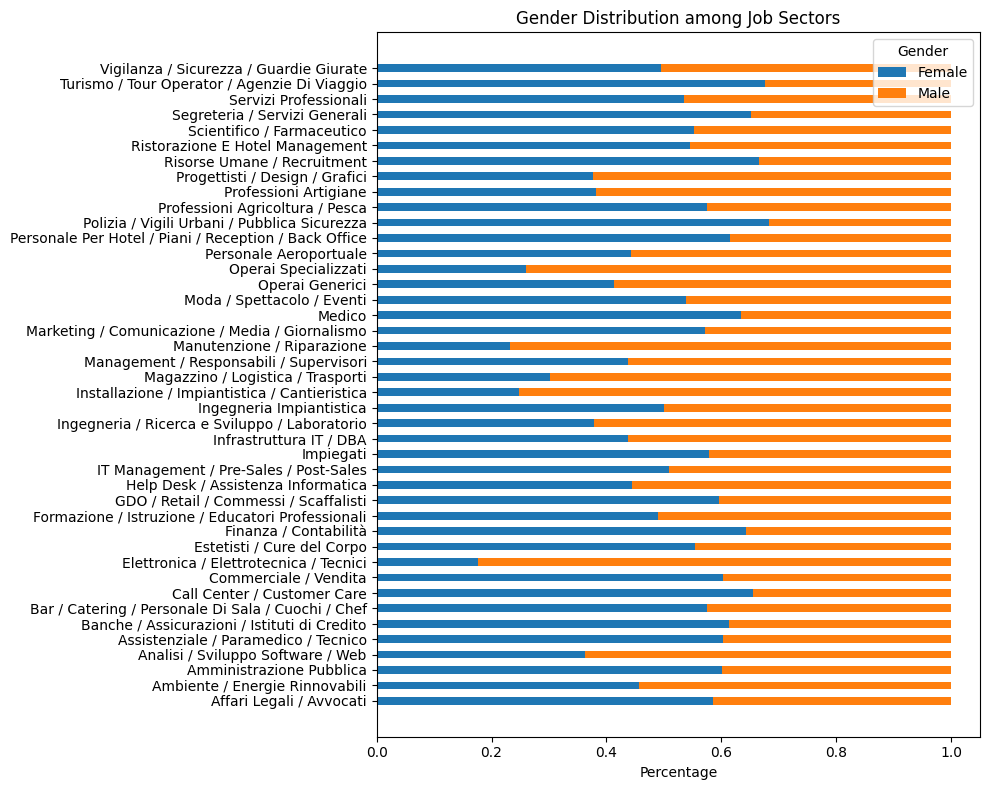

In [125]:
# Visualize gender distribution
def plot_gender_distribution(
    df: pd.DataFrame, sector_col: str, gender_col: str
) -> None:
    # Calculate the total number of each job sector
    total = df[sector_col].value_counts()

    # Calculate the number of each gender in each job sector
    counts = df.groupby([sector_col, gender_col]).size()

    # Calculate the percentage
    percentages = counts.div(total, level=sector_col) * 100

    # Create a new figure with a specified size
    fig, ax = plt.subplots(figsize=(10, 8))

    # Get the data
    data = percentages.unstack()

    # Normalize the data
    data_normalized = data.div(data.sum(axis=1), axis=0)

    # Plot the data
    y = range(len(data_normalized.index))
    cumulative_size = np.zeros(len(data_normalized.index))
    for i, (colname, values) in enumerate(data_normalized.items()):
        ax.barh(
            y, values, left=cumulative_size, height=0.5
        )  # adjust height parameter as needed
        cumulative_size += values

    ax.set_yticks(y)
    ax.set_yticklabels(data.index)
    ax.set_xlabel("Percentage")
    ax.set_title("Gender Distribution among Job Sectors")
    ax.legend(["Female", "Male"], title="Gender")
    plt.tight_layout()
    plt.show()


plot_gender_distribution(df, "job_sector", "cand_gender")

# Preprocessing

In [126]:
df_processed = df.copy()

In [127]:
# Transform cand_id to float
df_processed["cand_id"] = df["cand_id"].str.replace(",", "").astype(int)

In [128]:
# Transform cand_gender into binary (0, 1)
df_processed["cand_gender"] = (df["cand_gender"] == "Male").astype(int)

In [129]:
# Transform cand_age_bucket into numbers (0, 1, 2, 3, 4)
unique_values = sorted(df["cand_age_bucket"].unique().tolist())
cand_age_bucket_encoding = dict(zip(unique_values, range(len(unique_values))))
df_processed["cand_age_bucket"] = df["cand_age_bucket"].replace(
    cand_age_bucket_encoding
)
print(cand_age_bucket_encoding)

{'15-24': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-74': 4}


In [130]:
# Transform cand_domicile_province into numbers
unique_values = sorted(
    df["cand_domicile_province"].unique().tolist(), key=lambda x: str(x)
)
cand_domicile_province_encoding = dict(zip(unique_values, range(len(unique_values))))
df_processed["cand_domicile_province"] = df["cand_domicile_province"].replace(
    cand_domicile_province_encoding
)
print(cand_domicile_province_encoding)

{'AG': 0, 'AL': 1, 'AN': 2, 'AO': 3, 'AP': 4, 'AQ': 5, 'AR': 6, 'AT': 7, 'AV': 8, 'BA': 9, 'BG': 10, 'BI': 11, 'BL': 12, 'BN': 13, 'BO': 14, 'BR': 15, 'BS': 16, 'BT': 17, 'BZ': 18, 'CA': 19, 'CB': 20, 'CE': 21, 'CH': 22, 'CL': 23, 'CN': 24, 'CO': 25, 'CR': 26, 'CS': 27, 'CT': 28, 'CZ': 29, 'EN': 30, 'FC': 31, 'FE': 32, 'FG': 33, 'FI': 34, 'FM': 35, 'FR': 36, 'GE': 37, 'GO': 38, 'GR': 39, 'IM': 40, 'IS': 41, 'KR': 42, 'LC': 43, 'LE': 44, 'LI': 45, 'LO': 46, 'LT': 47, 'LU': 48, 'MB': 49, 'MC': 50, 'ME': 51, 'MI': 52, 'MN': 53, 'MO': 54, 'MS': 55, 'MT': 56, 'NO': 57, 'NU': 58, 'OR': 59, 'PA': 60, 'PC': 61, 'PD': 62, 'PE': 63, 'PG': 64, 'PI': 65, 'PN': 66, 'PO': 67, 'PR': 68, 'PT': 69, 'PU': 70, 'PV': 71, 'PZ': 72, 'RA': 73, 'RC': 74, 'RE': 75, 'RG': 76, 'RI': 77, 'RM': 78, 'RN': 79, 'RO': 80, 'SA': 81, 'SC': 82, 'SI': 83, 'SO': 84, 'SP': 85, 'SR': 86, 'SS': 87, 'SU': 88, 'SV': 89, 'TA': 90, 'TE': 91, 'TN': 92, 'TO': 93, 'TP': 94, 'TR': 95, 'TS': 96, 'TV': 97, 'UD': 98, 'VA': 99, 'VB': 100

In [131]:
# Transform cand_domicile_region into numbers
unique_values = sorted(
    df["cand_domicile_region"].unique().tolist(), key=lambda x: str(x)
)
cand_domicile_region_encoding = dict(zip(unique_values, range(len(unique_values))))
df_processed["cand_domicile_region"] = df["cand_domicile_region"].replace(
    cand_domicile_region_encoding
)
print(cand_domicile_region_encoding)

{'ABRUZZO': 0, 'BASILICATA': 1, 'CALABRIA': 2, 'CAMPANIA': 3, 'EMILIA ROMAGNA': 4, 'FRIULI VENEZIA GIULIA': 5, 'LAZIO': 6, 'LIGURIA': 7, 'LOMBARDIA': 8, 'MARCHE': 9, 'MOLISE': 10, 'PIEMONTE': 11, 'PUGLIA': 12, 'SARDEGNA': 13, 'SICILIA': 14, 'TOSCANA': 15, 'TRENTINO ALTO ADIGE': 16, 'UMBRIA': 17, "VALLE D'AOSTA": 18, 'VENETO': 19, nan: 20}


In [132]:
# Tramform job_contract_type into numbers
unique_values = sorted(df["job_contract_type"].unique().tolist(), key=lambda x: str(x))
job_contract_type_encoding = dict(zip(unique_values, range(len(unique_values))))
df_processed["job_contract_type"] = df["job_contract_type"].replace(
    job_contract_type_encoding
)
print(job_contract_type_encoding)

{'Lavoro subordinato': 0, 'Other': 1, 'Ricerca e selezione': 2}


In [133]:
# Transform job_sector into numbers
unique_values = sorted(df["job_sector"].unique().tolist(), key=lambda x: str(x))
job_sector_encoding = dict(zip(unique_values, range(len(unique_values))))
df_processed["job_sector"] = df["job_sector"].replace(job_sector_encoding)
print(job_sector_encoding)

{'Affari Legali / Avvocati': 0, 'Ambiente / Energie Rinnovabili': 1, 'Amministrazione Pubblica': 2, 'Analisi / Sviluppo Software / Web': 3, 'Assistenziale / Paramedico / Tecnico': 4, 'Banche / Assicurazioni / Istituti di Credito': 5, 'Bar / Catering / Personale Di Sala / Cuochi / Chef': 6, 'Call Center / Customer Care': 7, 'Commerciale / Vendita': 8, 'Elettronica / Elettrotecnica / Tecnici': 9, 'Estetisti / Cure del Corpo': 10, 'Finanza / Contabilità': 11, 'Formazione / Istruzione / Educatori Professionali': 12, 'GDO / Retail / Commessi / Scaffalisti': 13, 'Help Desk / Assistenza Informatica': 14, 'IT Management / Pre-Sales / Post-Sales': 15, 'Impiegati': 16, 'Infrastruttura IT / DBA': 17, 'Ingegneria / Ricerca e Sviluppo / Laboratorio': 18, 'Ingegneria Impiantistica': 19, 'Installazione / Impiantistica / Cantieristica': 20, 'Magazzino / Logistica / Trasporti': 21, 'Management / Responsabili / Supervisori': 22, 'Manutenzione / Riparazione': 23, 'Marketing / Comunicazione / Media / Gior

In [134]:
# Transform job_work_province into numbers
unique_values = sorted(df["job_work_province"].unique().tolist(), key=lambda x: str(x))
job_work_province_encoding = dict(zip(unique_values, range(len(unique_values))))
df_processed["job_work_province"] = df["job_work_province"].replace(
    job_work_province_encoding
)
print(job_work_province_encoding)

{'AG ': 0, 'AL ': 1, 'AN ': 2, 'AO ': 3, 'AP ': 4, 'AQ ': 5, 'AR ': 6, 'AT ': 7, 'AV ': 8, 'BA ': 9, 'BG ': 10, 'BI ': 11, 'BL ': 12, 'BN ': 13, 'BO ': 14, 'BR ': 15, 'BS ': 16, 'BT ': 17, 'BZ ': 18, 'CA ': 19, 'CB ': 20, 'CE ': 21, 'CH ': 22, 'CL ': 23, 'CN ': 24, 'CO ': 25, 'CR ': 26, 'CS ': 27, 'CT ': 28, 'CZ ': 29, 'EN ': 30, 'FC ': 31, 'FE ': 32, 'FG ': 33, 'FI ': 34, 'FM ': 35, 'FR ': 36, 'GE ': 37, 'GO ': 38, 'IM ': 39, 'IS ': 40, 'KR ': 41, 'LC ': 42, 'LE ': 43, 'LI ': 44, 'LO ': 45, 'LT ': 46, 'LU ': 47, 'MB ': 48, 'MC ': 49, 'ME ': 50, 'MI ': 51, 'MN ': 52, 'MO ': 53, 'MS ': 54, 'MT ': 55, 'NA ': 56, 'NO ': 57, 'NU ': 58, 'OG ': 59, 'OR ': 60, 'PA ': 61, 'PC ': 62, 'PD ': 63, 'PE ': 64, 'PG ': 65, 'PI ': 66, 'PN ': 67, 'PO ': 68, 'PR ': 69, 'PT ': 70, 'PU ': 71, 'PV ': 72, 'PZ ': 73, 'RA ': 74, 'RC ': 75, 'RE ': 76, 'RG ': 77, 'RI ': 78, 'RM ': 79, 'RN ': 80, 'RO ': 81, 'SA ': 82, 'SI ': 83, 'SO ': 84, 'SP ': 85, 'SR ': 86, 'SS ': 87, 'SU ': 88, 'SV ': 89, 'TA ': 90, 'TE ': 9

In [138]:
# Transform cand_education into numbers
ranked_education_levels = {
    "Dottorato": 8,
    "Master": 7,
    "Laurea": 6,
    "Attestato": 5,
    "Diploma": 4,
    "ITS": 3,
    "Media": 2,
    "Elementare": 1,
    "Null": 0,
}

df_education = df.copy()

# Replace null values with an empty string
df_education["cand_education"] = df_education["cand_education"].fillna("Null")

# Replace the values in cand_education with the corresponding level
for level in ranked_education_levels.keys():
    df_education.loc[
        df_education["cand_education"].str.contains(level, case=False), "cand_education"
    ] = level

# Transform cand_education into numbers preserving the order of the levels
df_processed["cand_education"] = df_education["cand_education"].replace(
    ranked_education_levels
)

print(ranked_education_levels)


{'Dottorato': 8, 'Master': 7, 'Laurea': 6, 'Attestato': 5, 'Diploma': 4, 'ITS': 3, 'Media': 2, 'Elementare': 1, 'Null': 0}


## Visualization Post Processing

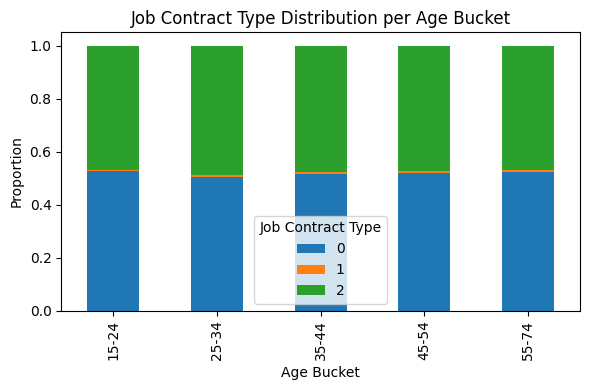

In [110]:
# Visualize age distribution histogram per job_contract_type
def plot_age_distribution_per_contract_type(
    df: pd.DataFrame, age_col: str = "cand_age_bucket"
) -> None:
    # Create a new figure with a specified size
    fig, ax = plt.subplots(figsize=(6, 4))

    # Get encoding of contract type
    contract_type_encoding = {
        value: key for key, value in job_contract_type_encoding.items()
    }

    # Define bin edges
    bins = np.arange(-0.5, len(df[age_col].unique()), 1)

    # Plot the data
    for contract_type, data in df.groupby("job_contract_type"):
        ax.hist(
            data[age_col],
            label=contract_type_encoding[contract_type],
            bins=bins,
            rwidth=0.7,
        )

    # Get encoding of ages bucket
    age_bucket_encoding = {
        value: key for key, value in cand_age_bucket_encoding.items()
    }

    # Set x-labels
    xlabels = list(age_bucket_encoding.values())
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)

    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")
    ax.set_title("Age Distribution per Job Contract Type")
    ax.legend(title="Job Contract Type")
    plt.tight_layout()
    plt.show()


def plot_job_distribution_per_age_bucket(
    df: pd.DataFrame, age_col: str = "cand_age_bucket"
) -> None:
    # Create a new figure with a specified size
    fig, ax = plt.subplots(figsize=(6, 4))

    # Calculate the total number of each age bucket
    total = df[age_col].value_counts()

    # Calculate the number of each contract type in each age bucket
    counts = df.groupby([age_col, "job_contract_type"]).size()

    # Calculate the proportion
    proportions = counts.div(total, level=age_col)

    # Get the data
    data = proportions.unstack()

    # Plot the data
    data.plot(kind="bar", stacked=True, ax=ax)

    # Get encoding of ages bucket
    age_bucket_encoding = {
        value: key for key, value in cand_age_bucket_encoding.items()
    }

    # Set x-labels
    xlabels = list(age_bucket_encoding.values())
    ax.set_xticks(range(len(xlabels)))
    ax.set_xticklabels(xlabels)

    ax.set_xlabel("Age Bucket")
    ax.set_ylabel("Proportion")
    ax.set_title("Job Contract Type Distribution per Age Bucket")
    ax.legend(title="Job Contract Type")
    plt.tight_layout()
    plt.show()


plot_job_distribution_per_age_bucket(df_processed)